# 🧪 Module 23 Practice Notebook: K-Means Clustering

This notebook is for **student practice**.

### Objectives
- Practice implementing K-Means step by step
- Understand the role of scaling
- Use Elbow Method to choose k
- Interpret clustering results

**Instructions:**
- Do NOT skip TODOs
- Run cells in order
- Write your code only where TODO is mentioned

---


## 🔹 Section 1: Import Necessary Libraries

**TODO:** Import all required libraries for K-Means clustering.

Hint:
- numpy, pandas
- matplotlib, seaborn
- KMeans, StandardScaler


In [16]:
# TODO: Write your import statements here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shwetabh123/mall-customers")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mall-customers' dataset.
Path to dataset files: /kaggle/input/mall-customers


## 🔹 Section 2: Load the Dataset

We will use a **customer behavior dataset**.

Features:
- Annual Income (k$)
- Spending Score (1–100)


In [17]:
# Dataset source (do not change)
url = "/kaggle/input/mall-customers/Mall_Customers.csv"

# TODO: Load the dataset using pandas and store it in df
# TODO: Load the dataset using pandas and store it in df
df = pd.read_csv(url)


## 🔹 Section 3: Explore the Dataset

**TODO:**
- Display first 5 rows
- Check dataset shape
- Check column names


In [18]:
# TODO: Explore the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape (rows, columns):", df.shape)

print("\nColumn names:", df.columns.tolist())

First 5 rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset shape (rows, columns): (200, 5)

Column names: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


## 🔹 Section 4: Select Features for Clustering

We will use only numeric features:
- Annual Income (k$)
- Spending Score (1-100)

**TODO:** Create feature matrix X.


In [10]:
# TODO: Select the two features and store in X
# TODO: Select the two features and store in X
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## 🔹 Section 5: Feature Scaling

K-Means uses distance.

**TODO:**
- Create a StandardScaler
- Fit and transform X
- Store scaled data in X_scaled


In [30]:
# TODO: Scale the features
# TODO: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## 🔹 Section 6: Elbow Method (Choosing k)

**TODO:**
- Run K-Means for k = 1 to 10
- Store inertia values
- Plot k vs inertia


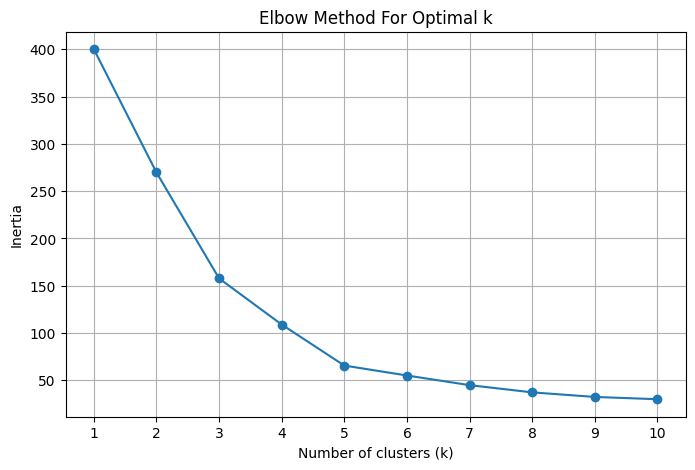

In [19]:
# TODO: Implement the Elbow Method
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## 🔹 Section 7: Apply K-Means Clustering

Choose k based on the Elbow plot.

**TODO:**
- Create KMeans model
- Fit on X_scaled
- Get cluster labels


In [28]:
# TODO: Fit K-Means and get labels
chosen_k = 5  # <-- Change this based on your elbow plot!
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

## 🔹 Section 8: Visualize the Clusters

**TODO:**
- Add cluster labels to dataframe
- Create a scatter plot
- Color points by cluster


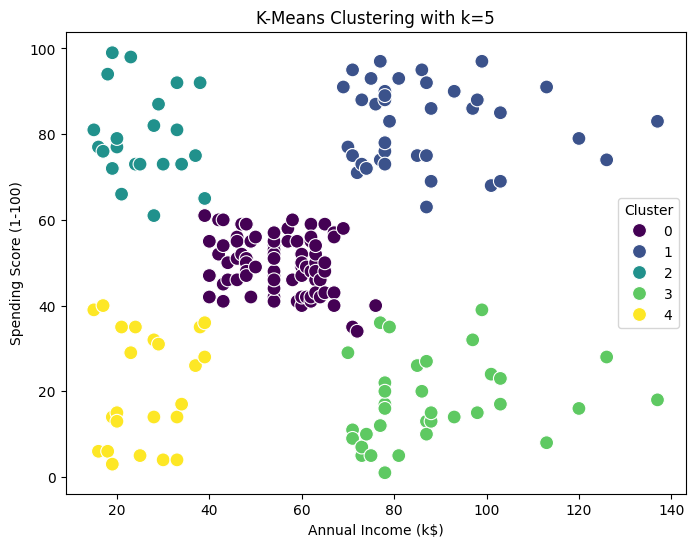

In [29]:
# TODO: Visualize the clusters
df['Cluster'] = labels  # Add cluster labels to the dataframe

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title(f'K-Means Clustering with k={chosen_k}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

## 🔹 Section 9: Evaluate Clustering (Silhouette Score)

**TODO:**
- Calculate silhouette score
- Print the score
- Comment on the quality


In [23]:
# TODO: Compute silhouette score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Comment on the clustering quality
if sil_score > 0.7:
    print("The clustering quality is high, with well-separated clusters.")
elif sil_score > 0.5:
    print("The clustering quality is moderate, with some separation between clusters.")
else:
    print("The clustering quality is low, with unclear separation between clusters. You may need to reconsider the choice of k.")

Silhouette Score: 0.5547
The clustering quality is moderate, with some separation between clusters.


## 🔹 Section 10: Reflection Questions

Answer in markdown (write below):

1. Why is scaling mandatory for K-Means?
2. What happens if k is chosen too large?
3. Is K-Means suitable for all datasets? Why or why not?


1. **Why is scaling mandatory for K-Means?**

   K-Means clustering is based on distance metrics, typically Euclidean distance. When features have different scales (e.g., Annual Income in thousands vs. Spending Score from 1-100), the feature with the larger scale will dominate the distance calculation. This can lead to biased clustering where one feature unduly influences the results. Scaling (e.g., using `StandardScaler`) ensures that all features contribute equally by transforming them to have zero mean and unit variance.

2. **What happens if k is chosen too large?**

   Choosing an excessively large value for k will result in many small clusters, possibly with just one or very few data points each. This leads to overfitting, where the model captures noise rather than meaningful patterns. The clusters may lose practical interpretability, and the model becomes overly complex. Additionally, it becomes harder to derive actionable insights from too many granular clusters.

3. **Is K-Means suitable for all datasets? Why or why not?**

   No, K-Means is not suitable for all datasets. It makes several key assumptions:
   - **Cluster Shape:** K-Means assumes that clusters are convex and roughly spherical. It performs poorly on clusters with complex shapes like rings or moons.
   - **Feature Scaling:** It is sensitive to the scale of the features, so improper scaling can lead to poor clustering.
   - **Initial Centroids:** The algorithm is sensitive to the initial placement of centroids, which can lead to different results across runs (though `n_init` helps mitigate this).
   - **Known k:** You must predefine the number of clusters (k), which is not always obvious and often requires methods like the elbow method or silhouette analysis.
   - **Outliers:** K-Means is sensitive to outliers, which can disproportionately affect centroid positions.

   For datasets that do not meet these assumptions, other clustering algorithms like DBSCAN (for arbitrary-shaped clusters), hierarchical clustering, or Gaussian Mixture Models may be more appropriate.